In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bike = pd.read_csv("C:\\Users\\Vinutha\\Downloads\\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape
bike.info()
bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
    bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bike_dup = bike.copy()

bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [6]:
bike.shape

(730, 16)

In [7]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','cnt']]

In [8]:
bike_new.shape

(730, 12)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
bike_new['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

In [11]:
bike_new['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
import calendar

bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
bike_new['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [14]:
bike_new['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [15]:
bike_new['weathersit'].value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [16]:
bike_new['weekday']=bike_new.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [17]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


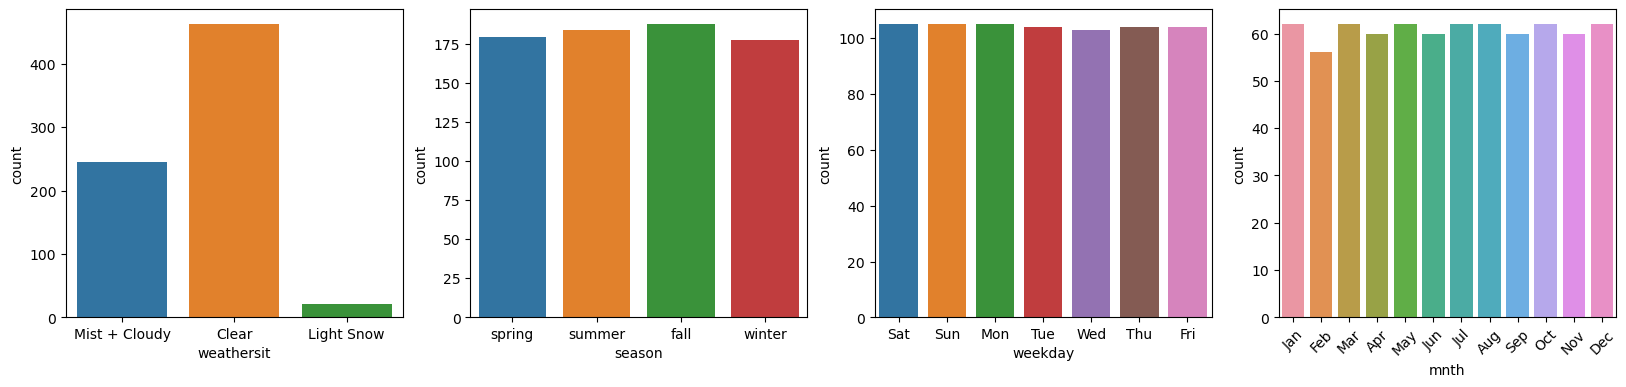

In [18]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = bike_new, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = bike_new, x = 'season')
plt.subplot(143)
sns.countplot(data = bike_new, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bike_new, x = 'mnth')
plt.show()

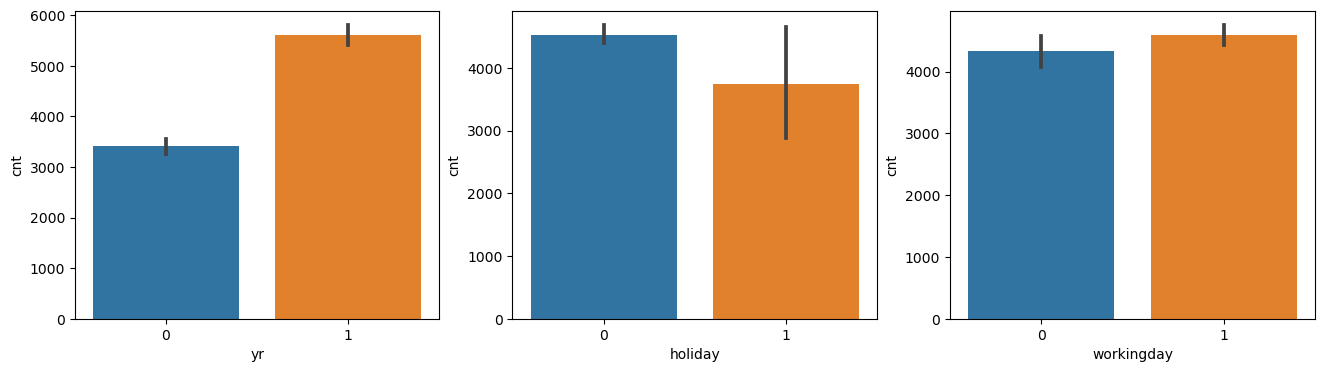

In [19]:
plt.figure(figsize = [16,4])
plt.subplot(131)
sns.barplot('yr', 'cnt', data = bike_new )
plt.subplot(132)
sns.barplot('holiday', 'cnt', data = bike_new)
plt.subplot(133)
sns.barplot('workingday', 'cnt', data = bike_new)
plt.show()

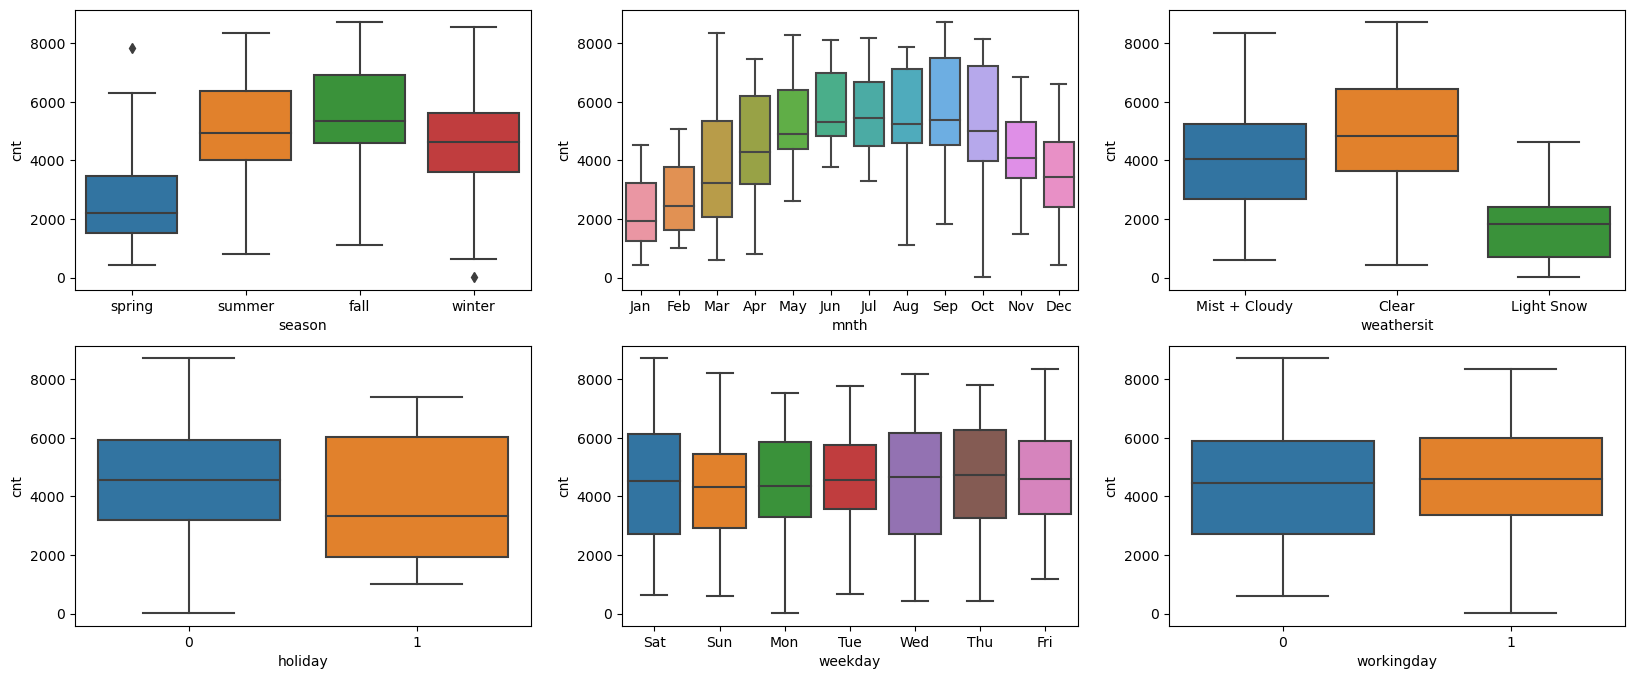

In [20]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()

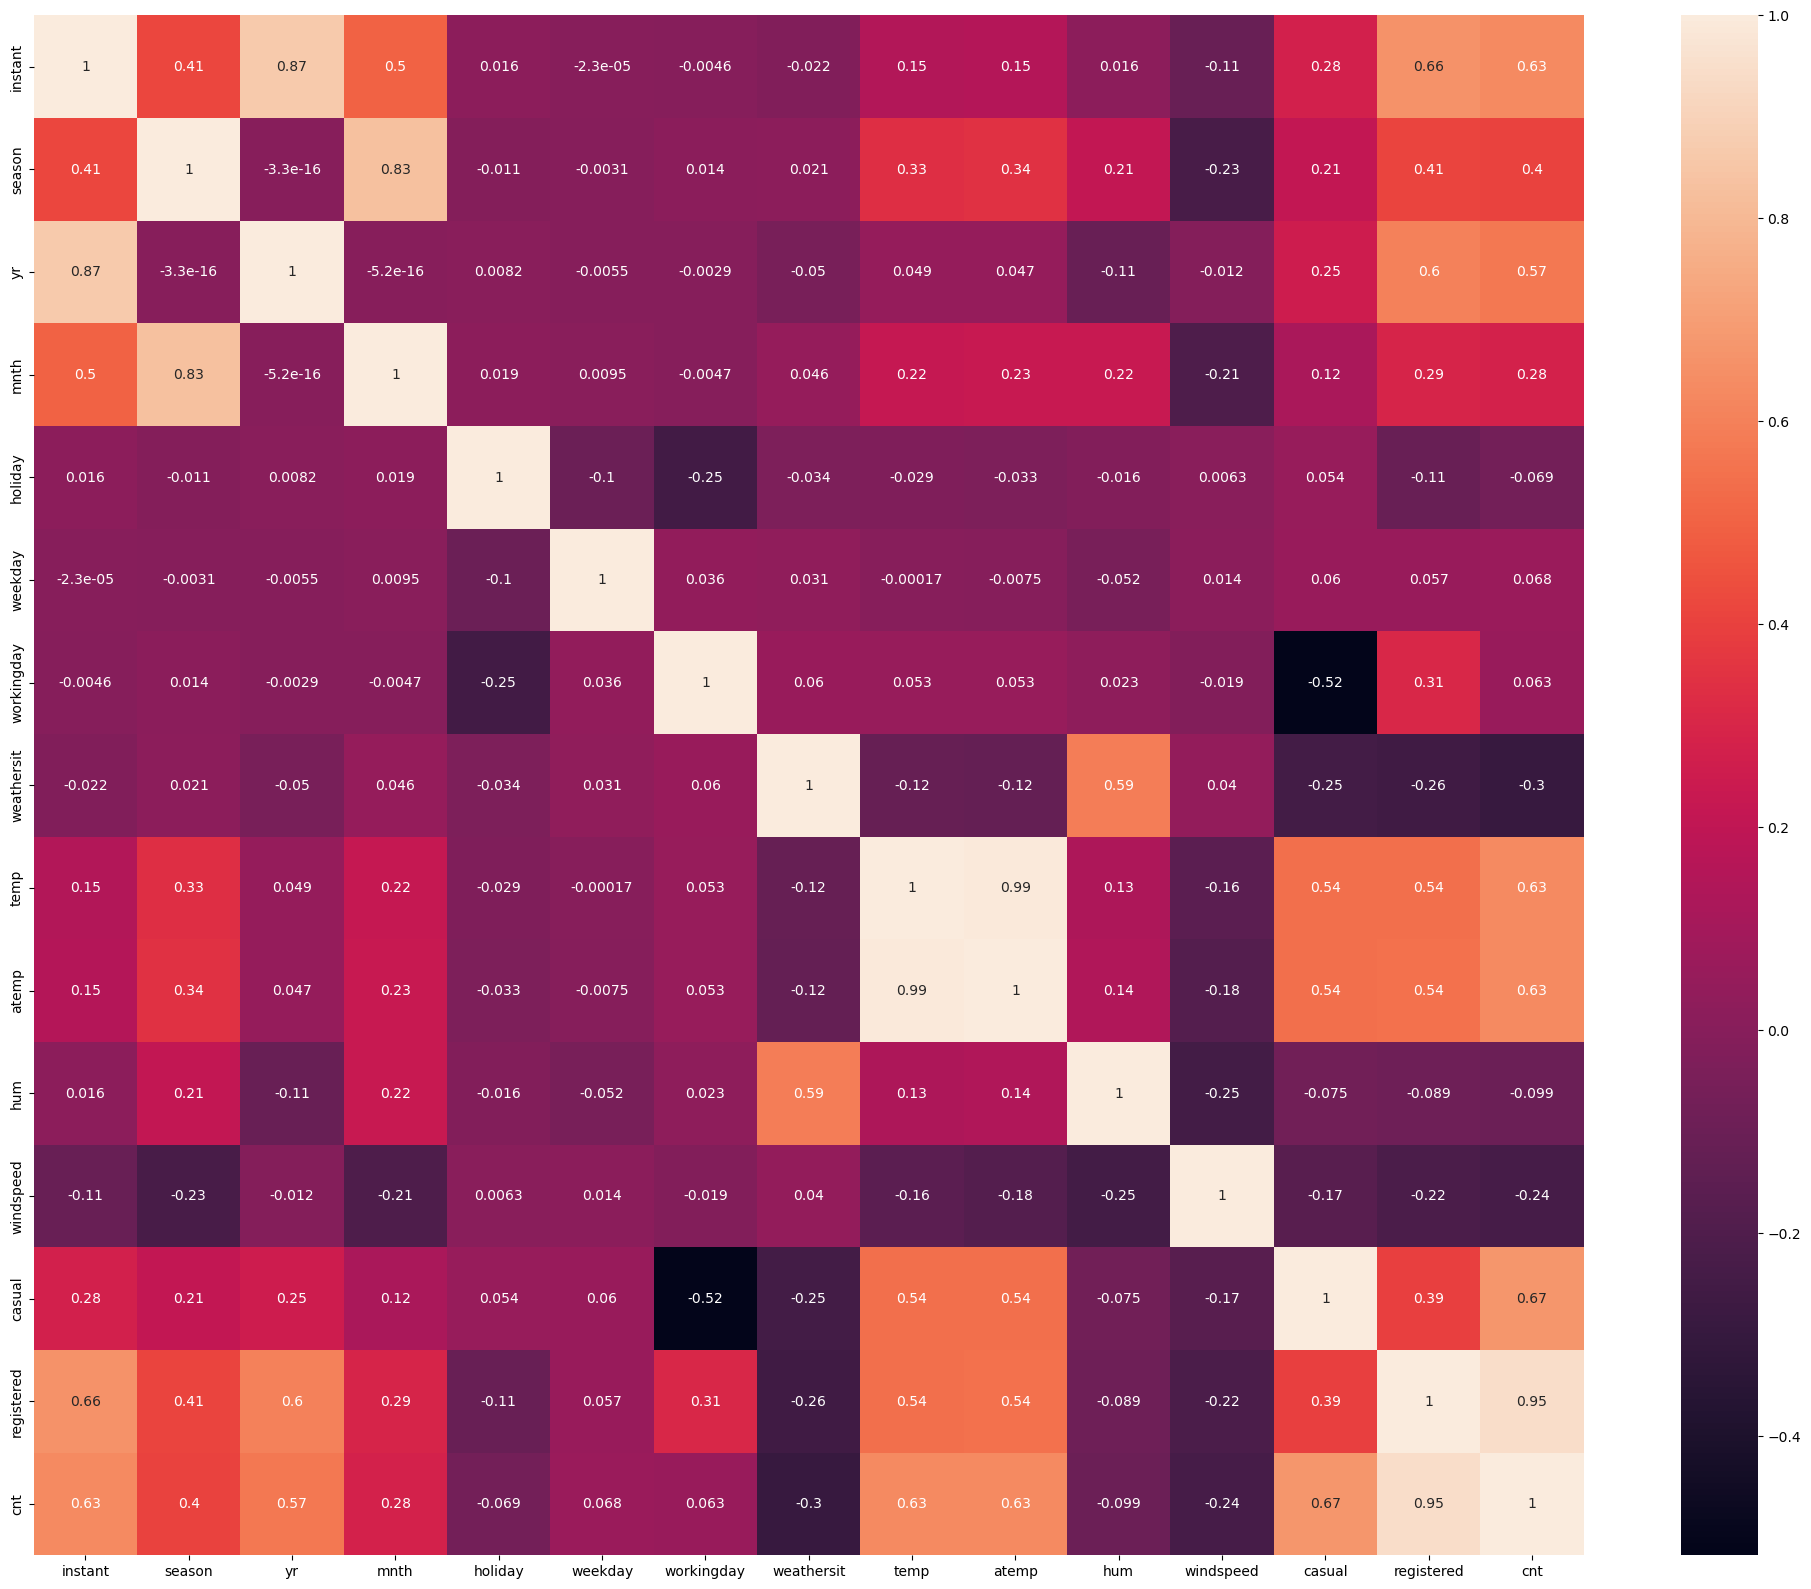

In [21]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True)
plt.show()

In [22]:
bike_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
months=pd.get_dummies(bike_new.mnth,drop_first=True)
weekdays=pd.get_dummies(bike_new.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike_new.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_new.season,drop_first=True)

bike_new=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike_new.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,...,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,...,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,...,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,...,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
bike_new.shape

(730, 38)

In [28]:
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_new.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
bike_new.shape

(730, 34)

In [30]:
bike_new=bike_new.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike_new.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [31]:
bike_new.shape

(730, 29)

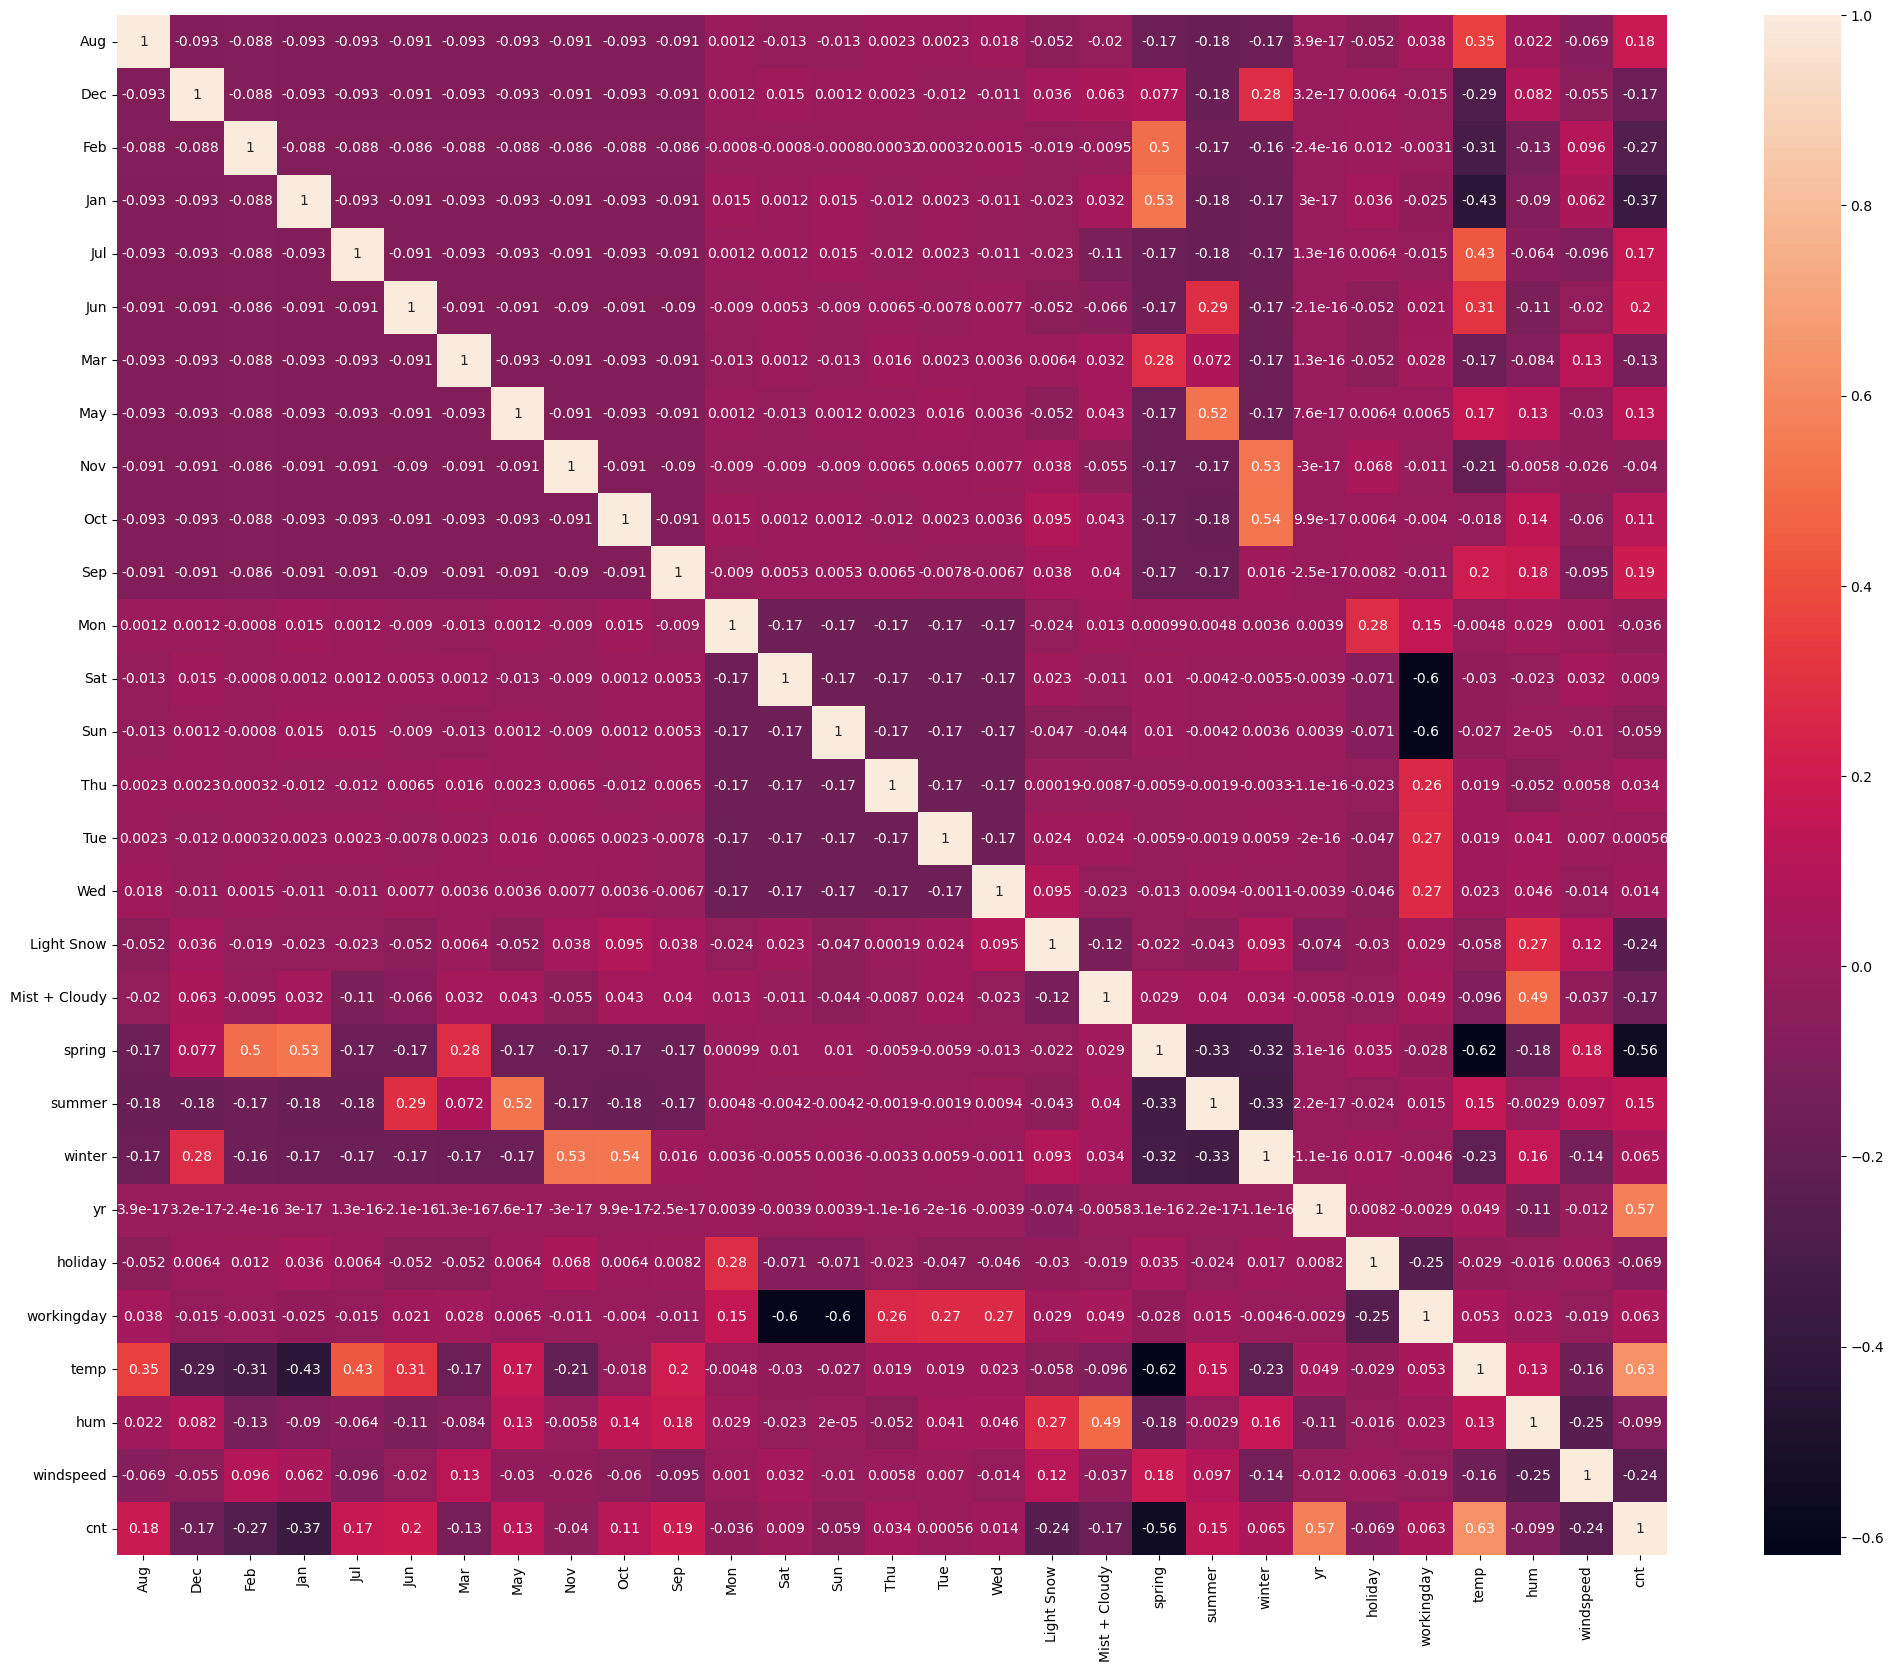

In [34]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_new.corr(), annot = True)
plt.show()

In [32]:
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)


In [33]:
bike_train.shape

(510, 29)

In [35]:
bike_test.shape

(220, 29)

In [36]:
scaler = MinMaxScaler()

In [37]:
num_vars = ['temp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [38]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [39]:
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


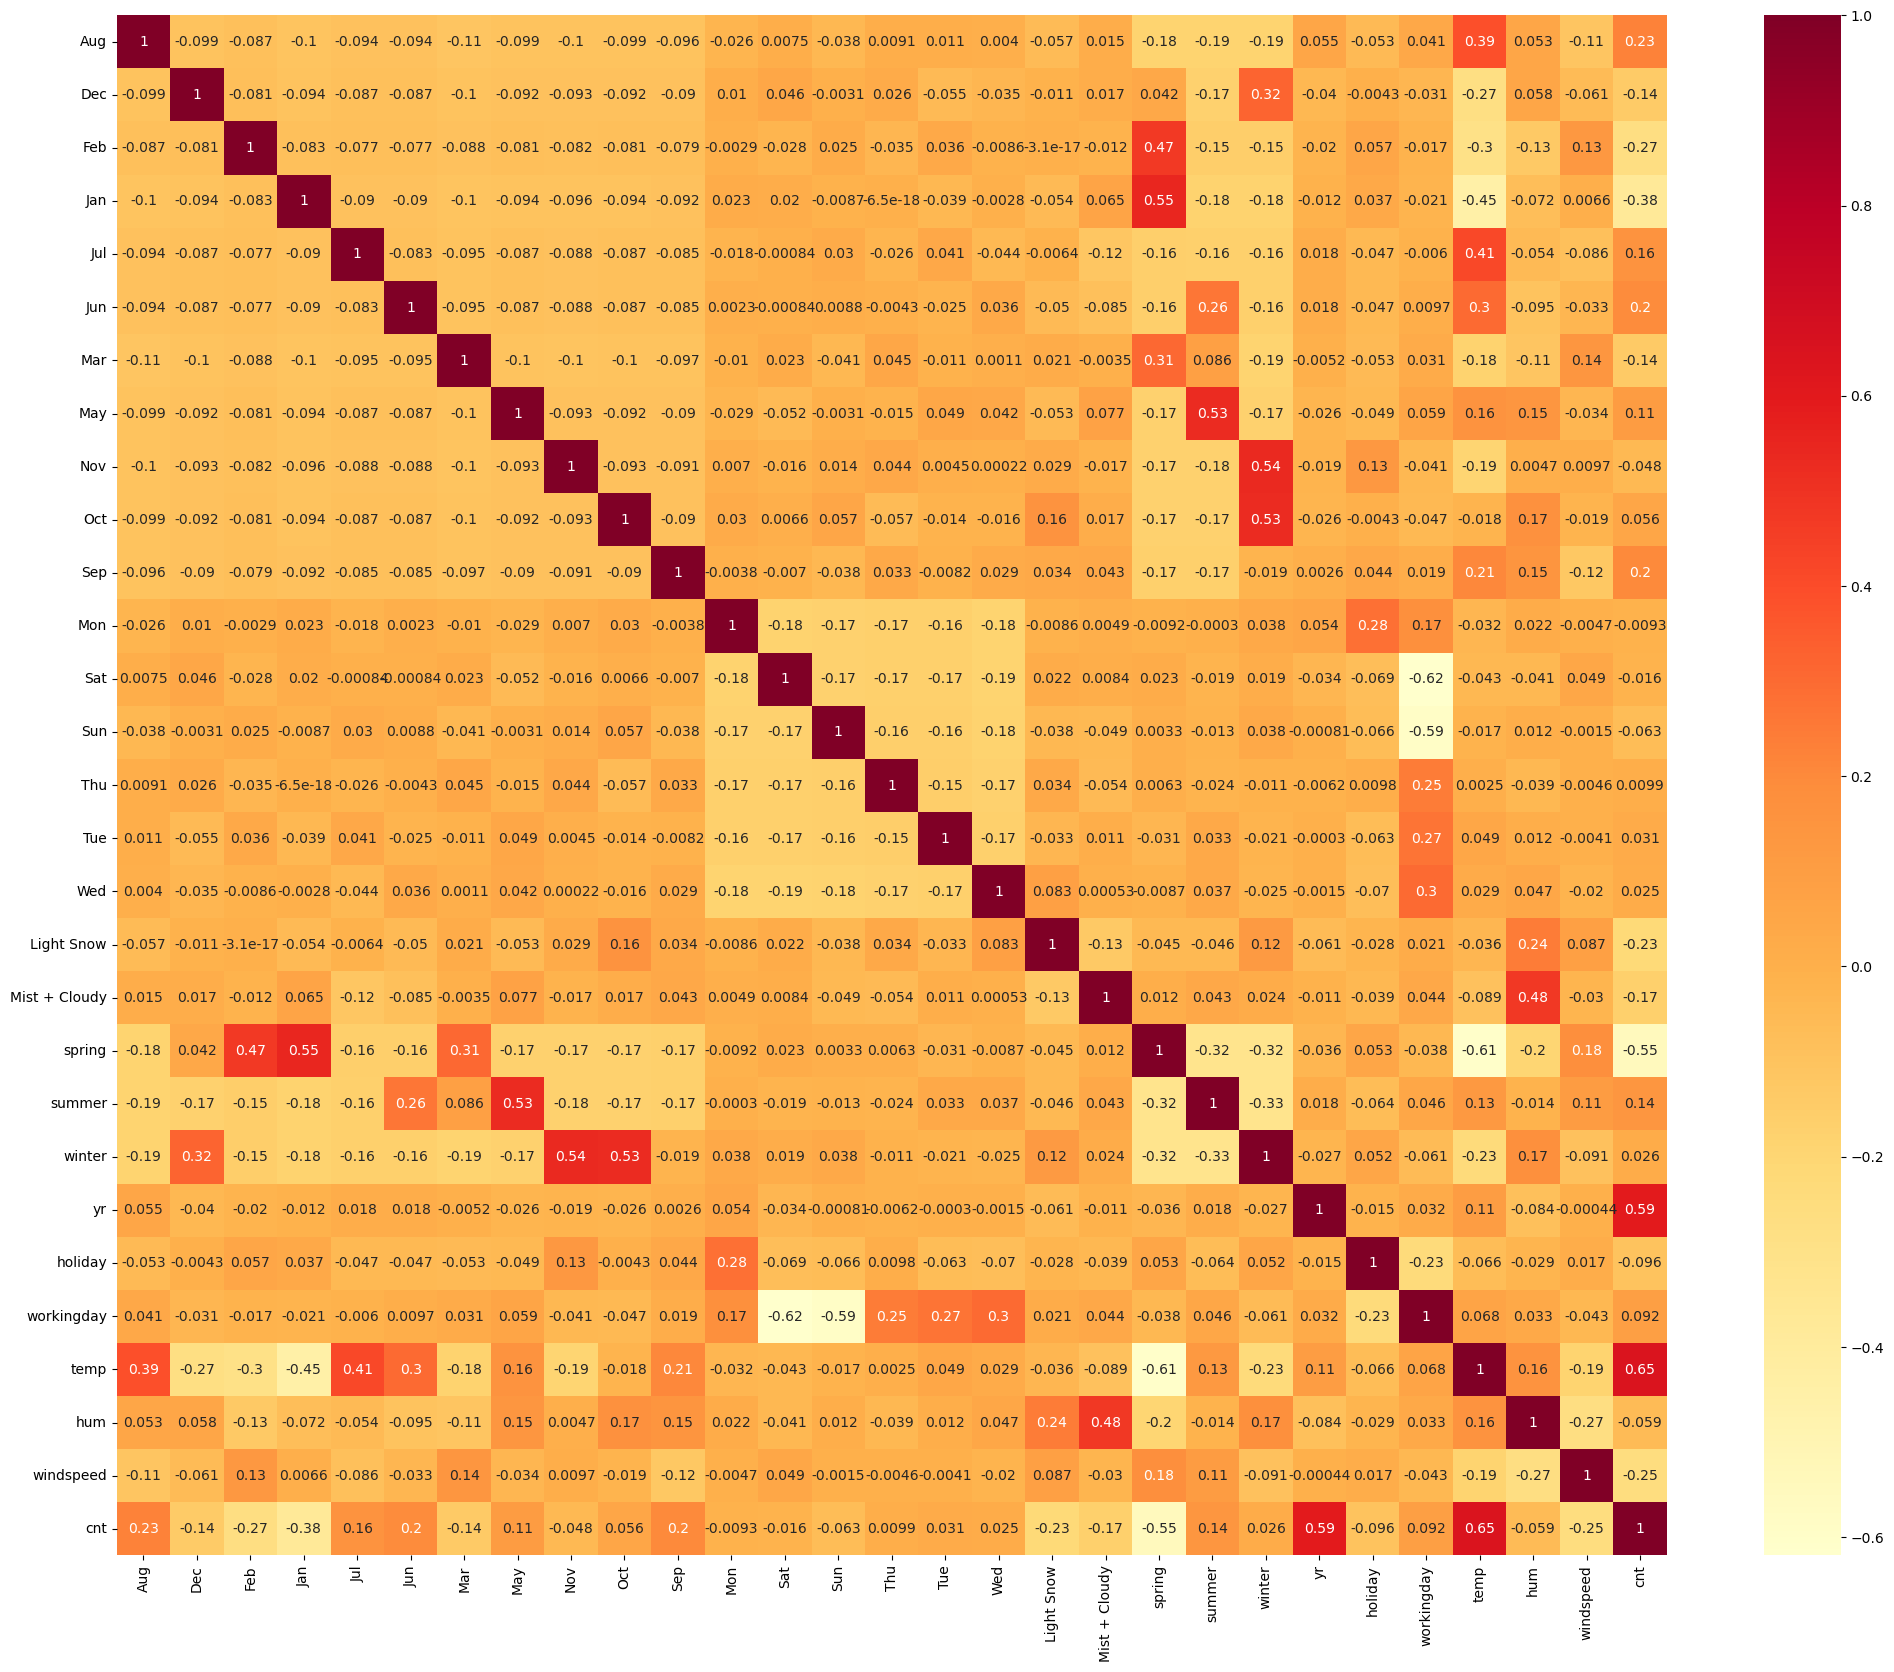

In [40]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [42]:
y_train = bike_train.pop('cnt')
X_train = bike_train
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 5),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 14),
 ('May', False, 12),
 ('Nov', False, 2),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'Jul', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'summer'],
      dtype='object')

In [49]:
X_train_rfe = X_train[col]

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,hum,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


In [51]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [52]:
# Check the parameters obtained

lr1.params

const            0.252079
Jan             -0.040492
Jul             -0.074631
Sep              0.059937
Sat              0.106817
Sun              0.053730
Light Snow      -0.252497
Mist + Cloudy   -0.057664
spring          -0.099167
winter           0.051694
yr               0.231671
holiday         -0.005240
workingday       0.096773
temp             0.459647
hum             -0.143434
windspeed       -0.175777
dtype: float64

In [53]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.51e-190
Time:                        14:35:43   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.025      9.930

In [54]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [55]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [56]:
lr2.params

const            0.348852
Jan             -0.040492
Jul             -0.074631
Sep              0.059937
Sat              0.010045
Sun             -0.043043
Light Snow      -0.252497
Mist + Cloudy   -0.057664
spring          -0.099167
winter           0.051694
yr               0.231671
holiday         -0.102013
temp             0.459647
hum             -0.143434
windspeed       -0.175777
dtype: float64

In [57]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.51e-190
Time:                        14:37:59   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3489      0.031     11.208

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,23.54
11,temp,15.97
13,windspeed,4.07
7,spring,2.91
6,Mist + Cloudy,2.26
8,winter,2.12
9,yr,2.07
0,Jan,1.67
1,Jul,1.41
3,Sat,1.23


In [63]:
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

In [64]:
X_train_lm3 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [65]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.52e-188
Time:                        14:43:03   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     496   BIC:                            -925.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2730      0.024     11.231

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,4.76
12,windspeed,4.05
7,spring,2.27
9,yr,2.06
0,Jan,1.60
6,Mist + Cloudy,1.54
8,winter,1.43
1,Jul,1.36
3,Sat,1.23
4,Sun,1.21


In [70]:
X_train_new2 = X_train_new1.drop(["Sat"], axis = 1)

In [71]:
X_train_lm4 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [72]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.55e-189
Time:                        19:55:39   Log-Likelihood:                 505.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     497   BIC:                            -930.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2751      0.024     11.360

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.70
11,windspeed,4.01
6,spring,2.26
8,yr,2.06
0,Jan,1.60
5,Mist + Cloudy,1.54
7,winter,1.41
1,Jul,1.36
2,Sep,1.20
3,Sun,1.18


In [74]:
X_train_new3 = X_train_new2.drop(["Jan"], axis = 1)

In [75]:
X_train_lm5 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [76]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.32e-188
Time:                        19:58:01   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2608      0.024     11.027

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.67
10,windspeed,4.01
7,yr,2.06
5,spring,1.66
4,Mist + Cloudy,1.52
6,winter,1.41
0,Jul,1.35
1,Sep,1.20
2,Sun,1.18
3,Light Snow,1.08


In [80]:
X_train_new4 = X_train_new3.drop(["temp"],axis=1)

In [81]:
X_train_lm6 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [82]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     162.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.85e-150
Time:                        20:06:47   Log-Likelihood:                 408.79
No. Observations:                 510   AIC:                            -795.6
Df Residuals:                     499   BIC:                            -749.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5660      0.014     40.035

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,2.64
7,yr,1.77
5,spring,1.54
4,Mist + Cloudy,1.45
6,winter,1.41
2,Sun,1.16
0,Jul,1.11
1,Sep,1.10
3,Light Snow,1.08
8,holiday,1.05


In [84]:
X_train_lm6

,const,Jul,Sep,Sun,Light Snow,Mist + Cloudy,spring,winter,yr,holiday,windspeed
576,1.0,1,0,0,0,0,0,0,1,0,0.264686
426,1.0,0,0,0,0,1,1,0,1,0,0.255342
728,1.0,0,0,1,0,0,1,0,1,0,0.663106
482,1.0,0,0,0,0,1,0,0,1,0,0.188475
111,1.0,0,0,0,0,1,0,0,0,0,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,0,0.187140
53,1.0,0,0,0,0,0,1,0,0,0,0.111379
350,1.0,0,0,0,0,1,0,1,0,0,0.431816
79,1.0,0,0,0,0,1,0,0,0,0,0.529881


In [86]:
y_train_pred = lr6.predict(X_train_lm6)

<AxesSubplot:ylabel='Density'>

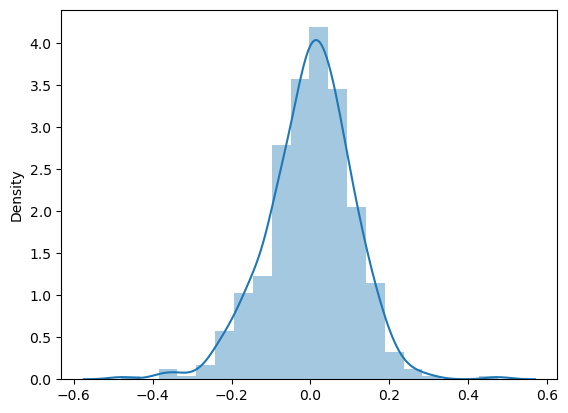

In [87]:
sns.distplot((y_train - y_train_pred), bins = 20)

In [88]:
#Apply scaling on test data
num_vars=['temp','hum','windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [90]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [92]:
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Jul,Sep,Sun,Light Snow,Mist + Cloudy,spring,winter,yr,holiday,windspeed
184,1.0,1,0,0,0,1,0,0,0,1,0.084219
535,1.0,0,0,0,0,0,0,0,1,0,0.153728
299,1.0,0,0,0,0,1,0,1,0,0,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0.339570
152,1.0,0,0,0,0,0,0,0,0,0,0.537414


In [93]:
y_pred = lr6.predict(X_test_new1)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7476628886497352

In [95]:
Adj_r2=1-(1-0.7476628886)*(11-1)/(11-1-1)
print(Adj_r2)

0.7196254317777777


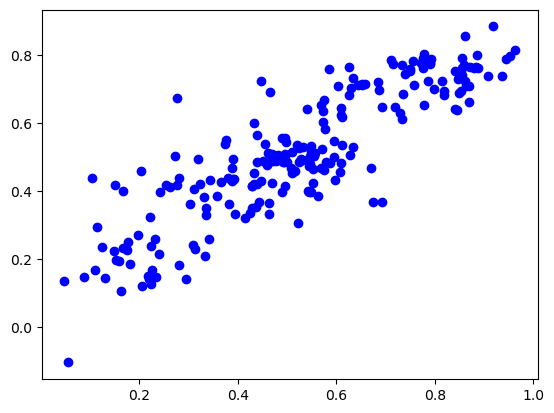

In [96]:
plt.scatter(y_test,y_pred,color='blue')

<AxesSubplot:xlabel='cnt'>

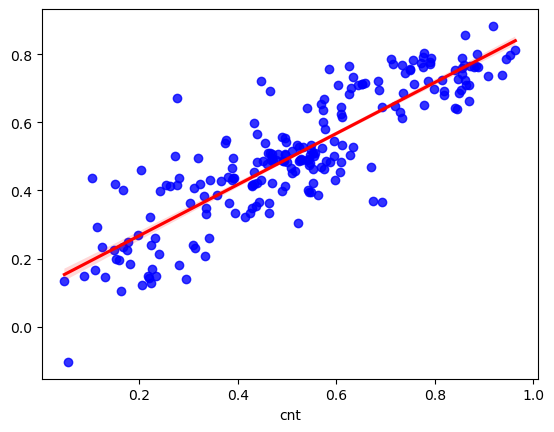

In [97]:
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
#We can see that the equation of our best fitted line is:
#cnt = 0.175*Jul+0.935*Sep-0.0494*Sun-0.3010*LightSnow-0.930*Mist + Cloudy -0.2698*spring-0.0498*winter+0.2476*yr-0.1080*holiday-0.1821*windspeed